# **SalaryPrediction Logistic Regression Model**
Bhagesh Gaur


ML-based prediction system that predicts if the graduates will get
"high salary" or not.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWi28dpkeBcZerOPtWDfD9hGWsKP0xC7SZg_mK5m1Sf5NWbrkImiq0U
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Data for IIS-Lab Assignment.xlsx')

In [ ]:
data

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,High-Salary
0,203097,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,1
1,579905,m,1989-10-04,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,1
2,810601,f,1992-08-03,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,1
3,267447,m,1989-12-05,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,1
4,343523,m,1991-02-27,78.00,cbse,2008,76.80,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,0
3994,752781,f,1992-08-27,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,0
3995,355888,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,1
3996,947111,f,1992-03-20,78.72,state board,2010,69.88,state board,979,2,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,0


In [ ]:
data.shape

(3998, 34)

In [ ]:
data.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,High-Salary
0,203097,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,1
1,579905,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,1
2,810601,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,1
3,267447,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,1
4,343523,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0


Column Headings

In [ ]:
col_names = data.columns

col_names

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'High-Salary'],
      dtype='object')

Summary of Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Gender                 3998 non-null   object        
 2   DOB                    3998 non-null   datetime64[ns]
 3   10percentage           3998 non-null   float64       
 4   10board                3998 non-null   object        
 5   12graduation           3998 non-null   int64         
 6   12percentage           3998 non-null   float64       
 7   12board                3998 non-null   object        
 8   CollegeID              3998 non-null   int64         
 9   CollegeTier            3998 non-null   int64         
 10  Degree                 3998 non-null   object        
 11  Specialization         3998 non-null   object        
 12  collegeGPA             3998 non-null   float64       
 13  Col

**Types of variables**

Segregating the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object.

Finding categorical variables:

In [ ]:
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Gender', '10board', '12board', 'Degree', 'Specialization', 'CollegeState']


Viewing the categorical variables

In [ ]:
data[categorical].head()

,Gender,10board,12board,Degree,Specialization,CollegeState
0,f,"board ofsecondary education,ap","board of intermediate education,ap",B.Tech/B.E.,computer engineering,Andhra Pradesh
1,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Madhya Pradesh
2,f,cbse,cbse,B.Tech/B.E.,information technology,Uttar Pradesh
3,m,cbse,cbse,B.Tech/B.E.,computer engineering,Delhi
4,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh


Checking for problems within categorical variables. Check missing values in categorical variables

In [ ]:
data[categorical].isnull().sum()

Gender            0
10board           0
12board           0
Degree            0
Specialization    0
CollegeState      0
dtype: int64

No missing values in categorical variables

Frequency counts of categorical variables

In [ ]:
# viewing frequency of categorical variables
for var in categorical: 
    print(data[var].value_counts())

m    3041
f     957
Name: Gender, dtype: int64
cbse                              1395
state board                       1164
0                                  350
icse                               281
ssc                                122
                                  ... 
msbshse,pune                         1
board ofsecondary education,ap       1
nagpur board,nagpur                  1
jawahar navodaya vidyalaya           1
karnataka secondary board            1
Name: 10board, Length: 275, dtype: int64
cbse                                               1400
state board                                        1254
0                                                   359
icse                                                129
up board                                             87
                                                   ... 
west bengal board of higher secondary education       1
secondary board of rajasthan                          1
tn state board                     

In [ ]:
# viewing frequency distribution of categorical variables
for var in categorical: 
    print(data[var].value_counts()/np.float(len(data)))

m    0.76063
f    0.23937
Name: Gender, dtype: float64
cbse                              0.348924
state board                       0.291146
0                                 0.087544
icse                              0.070285
ssc                               0.030515
                                    ...   
msbshse,pune                      0.000250
board ofsecondary education,ap    0.000250
nagpur board,nagpur               0.000250
jawahar navodaya vidyalaya        0.000250
karnataka secondary board         0.000250
Name: 10board, Length: 275, dtype: float64
cbse                                               0.350175
state board                                        0.313657
0                                                  0.089795
icse                                               0.032266
up board                                           0.021761
                                                     ...   
west bengal board of higher secondary education    0.000250
secondary

**Number of labels: cardinality**

The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the model.

In [ ]:
# checking cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')

Gender  contains  2  labels
10board  contains  275  labels
12board  contains  340  labels
Degree  contains  4  labels
Specialization  contains  46  labels
CollegeState  contains  26  labels


**NOTE: The above Output for Gender tells us it acts like a two state system or contains binary type data which has only 2 possible values.**

**Looking at Numerical Variables**

In [ ]:
# finding numerical variables
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 28 numerical variables

The numerical variables are : ['ID', 'DOB', '10percentage', '12graduation', '12percentage', 'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'High-Salary']


**Viewing the numerical variables**

In [ ]:
data[numerical].head()

,ID,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,High-Salary
0,203097,1990-02-19,84.3,2007,95.8,1141,2,78.00,1141,0,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,1
1,579905,1989-10-04,85.4,2007,85.0,5807,2,70.06,5807,0,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,1
2,810601,1992-08-03,85.0,2010,68.2,64,2,70.00,64,0,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,1
3,267447,1989-12-05,85.6,2007,83.6,6920,1,74.64,6920,1,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,1
4,343523,1991-02-27,78.0,2008,76.8,11368,2,73.90,11368,0,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0


# **Exploring problems within numerical variables**
Missing values in numerical variables

In [ ]:
#checking missing values in numerical variables
data[numerical].isnull().sum()

ID                       0
DOB                      0
10percentage             0
12graduation             0
12percentage             0
CollegeID                0
CollegeTier              0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
High-Salary              0
dtype: int64

from the above output we can see our numerical variables contain no missing variables

# **Feature Engineering**
Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.

To fix the issues arising with python syntax and data I have renamed the 10board and 12board categorical variables

In [ ]:
data.rename(columns={"10board":"board10"},inplace=True)
data.rename(columns={"12board":"board12"},inplace=True)

In [ ]:
# checking data types in data
data.dtypes

ID                                int64
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
board10                          object
12graduation                      int64
12percentage                    float64
board12                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64
Domain                          float64
ComputerProgramming               int64
ElectronicsAndSemicon             int64
ComputerScience                   int64
MechanicalEngg                    int64


In [ ]:
# displaying categorical variables
categorical = [col for col in data.columns if data[col].dtypes == 'O']
categorical

['Gender', 'board10', 'board12', 'Degree', 'Specialization', 'CollegeState']

In [ ]:
# displaying numerical variables
numerical = [col for col in data.columns if data[col].dtypes != 'O']
numerical

['ID',
 'DOB',
 '10percentage',
 '12graduation',
 '12percentage',
 'CollegeID',
 'CollegeTier',
 'collegeGPA',
 'CollegeCityID',
 'CollegeCityTier',
 'GraduationYear',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience',
 'High-Salary']

# **Encode categorical variables**

In [ ]:
pip install category_encoders

In [ ]:
categorical

['Gender', 'board10', 'board12', 'Degree', 'Specialization', 'CollegeState']

In [ ]:
data

,ID,Gender,DOB,10percentage,board10,12graduation,12percentage,board12,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,High-Salary
0,203097,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,1
1,579905,m,1989-10-04,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,1
2,810601,f,1992-08-03,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,1
3,267447,m,1989-12-05,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,1
4,343523,m,1991-02-27,78.00,cbse,2008,76.80,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,0
3994,752781,f,1992-08-27,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,0
3995,355888,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,1
3996,947111,f,1992-03-20,78.72,state board,2010,69.88,state board,979,2,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,0


In [ ]:
# printing number of labels in Gender variable
print('Gender contains', len(data['Gender'].unique()), 'labels')

Gender contains 2 labels


In [ ]:
# checking the frequency distribution of values in WindGustDir variable
data.Gender.value_counts()

m    3041
f     957
Name: Gender, dtype: int64

In [ ]:
# One Hot Encoding of Gender variable
# get n-1 dummy variables after One Hot Encoding
pd.get_dummies(data.Gender, drop_first=True, dummy_na=False).head()

,m
0,0
1,1
2,0
3,1
4,1


In [ ]:
data[categorical].head()

,Gender,board10,board12,Degree,Specialization,CollegeState
0,f,"board ofsecondary education,ap","board of intermediate education,ap",B.Tech/B.E.,computer engineering,Andhra Pradesh
1,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Madhya Pradesh
2,f,cbse,cbse,B.Tech/B.E.,information technology,Uttar Pradesh
3,m,cbse,cbse,B.Tech/B.E.,computer engineering,Delhi
4,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh


In [ ]:
data[categorical].isnull().sum()

Gender            0
board10           0
board12           0
Degree            0
Specialization    0
CollegeState      0
dtype: int64

**Encoding the Gender variable**

In [ ]:
# encode Gender variable
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['Gender'])
data = encoder.fit_transform(data)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
data.head()

,ID,Gender_0,Gender_1,DOB,10percentage,board10,12graduation,12percentage,board12,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,High-Salary
0,203097,0,1,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,1
1,579905,1,0,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,1
2,810601,0,1,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,1
3,267447,1,0,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,1
4,343523,1,0,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0


We can see that two additional variables Gender_0 and Gender_1 are created from Gender variable.

In [ ]:
data.board12.value_counts()

cbse                                               1400
state board                                        1254
0                                                   359
icse                                                129
up board                                             87
                                                   ... 
west bengal board of higher secondary education       1
secondary board of rajasthan                          1
tn state board                                        1
state board of technical education and training       1
hslc (tamil nadu state board)                         1
Name: board12, Length: 340, dtype: int64

## **DATA Prep-1**

In [ ]:
data = pd.concat([data[numerical], data[['Gender_0', 'Gender_1']],
                     pd.get_dummies(data.board10), 
                     pd.get_dummies(data.board12),
                     pd.get_dummies(data.Degree),
                     pd.get_dummies(data.Specialization),
                     pd.get_dummies(data.CollegeState)], axis=1)

## **DATA Prep-2**




In [ ]:
data = pd.concat([data[numerical], data[['Gender_0', 'Gender_1']],
                     pd.get_dummies(data.Degree),
                     pd.get_dummies(data.Specialization),
                     pd.get_dummies(data.CollegeState)], axis=1)


In [ ]:
data = data.drop(['ID'], axis=1)

In [ ]:
data.head()

,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,High-Salary,Gender_0,Gender_1,B.Tech/B.E.,M.Sc. (Tech.),M.Tech./M.E.,MCA,aeronautical engineering,applied electronics and instrumentation,automobile/automotive engineering,biomedical engineering,biotechnology,ceramic engineering,chemical engineering,...,information science engineering,information technology,instrumentation and control engineering,instrumentation engineering,internal combustion engine,mechanical & production engineering,mechanical and automation,mechanical engineering,mechatronics,metallurgical engineering,other,polymer technology,power systems and automation,telecommunication engineering,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Meghalaya,Orissa,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Union Territory,Uttar Pradesh,Uttarakhand,West Bengal
0,1990-02-19,84.3,2007,95.8,1141,2,78.00,1141,0,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,1,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1989-10-04,85.4,2007,85.0,5807,2,70.06,5807,0,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,1,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1992-08-03,85.0,2010,68.2,64,2,70.00,64,0,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,1,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1989-12-05,85.6,2007,83.6,6920,1,74.64,6920,1,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,1,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1991-02-27,78.0,2008,76.8,11368,2,73.90,11368,0,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
col_names = data.columns

col_names

Index(['DOB', '10percentage', '12graduation', '12percentage', 'CollegeID',
       'CollegeTier', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'GraduationYear',
       ...
       'Orissa', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Union Territory', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object', length=105)

## **DATA Prep-3 Feature Engineering of Date Variable**

In [ ]:
data['DOB'].dtypes

dtype('<M8[ns]')

In [ ]:
# parse the dates, currently coded as strings, into datetime format
data['DOB'] = pd.to_datetime(data['DOB'])
data['Year'] = data['DOB'].dt.year
data['Month'] = data['DOB'].dt.month
data['Day'] = data['DOB'].dt.day

In [ ]:
data

,ID,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,High-Salary,Gender_0,Gender_1,0,aisse,andhra pradesh board ssc,andhra pradesh state board,anglo indian,ap state board,ap state board for secondary education,apsche,apssc,aurangabad board,...,instrumentation engineering,internal combustion engine,mechanical & production engineering,mechanical and automation,mechanical engineering,mechatronics,metallurgical engineering,other,polymer technology,power systems and automation,telecommunication engineering,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Meghalaya,Orissa,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Union Territory,Uttar Pradesh,Uttarakhand,West Bengal,Year,Month,Day
0,203097,1990-02-19,84.30,2007,95.80,1141,2,78.00,1141,0,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1990,2,19
1,579905,1989-10-04,85.40,2007,85.00,5807,2,70.06,5807,0,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1989,10,4
2,810601,1992-08-03,85.00,2010,68.20,64,2,70.00,64,0,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1992,8,3
3,267447,1989-12-05,85.60,2007,83.60,6920,1,74.64,6920,1,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1989,12,5
4,343523,1991-02-27,78.00,2008,76.80,11368,2,73.90,11368,0,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1991,2,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,1987-04-15,52.09,2006,55.50,6268,2,61.50,6268,0,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1987,4,15
3994,752781,1992-08-27,90.00,2009,93.00,4883,2,77.30,4883,1,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1992,8,27
3995,355888,1991-07-03,81.86,2008,65.50,9786,2,70.00,9786,0,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1991,7,3
3996,947111,1992-03-20,78.72,2010,69.88,979,2,70.42,979,1,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1992,3,20


## **DATA Prep-4**

In [ ]:
data = pd.concat([data[numerical], data[['Gender_0', 'Gender_1']],
                     pd.get_dummies(data.board10), 
                     pd.get_dummies(data.board12),
                     pd.get_dummies(data.Degree),
                     pd.get_dummies(data.Specialization)], axis=1)

## **DATA Prep-5**

In [ ]:
data = pd.concat([data[numerical],
                     pd.get_dummies(data.Degree),
                     pd.get_dummies(data.Specialization),
                     pd.get_dummies(data.CollegeState)], axis=1)

# **Feature Selection**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Split the data into X & y
X = data.drop(['High-Salary','DOB'], axis = 1).values
y = data['High-Salary']
y = y.astype(int)
print(X.shape)
print(y.shape)

(3998, 722)
(3998,)


In [ ]:
# Run a Tree-based estimators (i.e. decision trees & random forests)
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=15, splitter='best')

In [ ]:
# Running Feature Importance
imp_col = []
imp = []
for i,column in enumerate(data.drop(['High-Salary','DOB'], axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i-1]))
    imp_col.append(column)
    imp.append(dt.feature_importances_[i-1])

The feature importance for ID is : 0.03548558782616286
The feature importance for 10percentage is : 0.11446203956391345
The feature importance for 12graduation is : 0.10478106133432769
The feature importance for 12percentage is : 0.010289669388462087
The feature importance for CollegeID is : 0.04141884887759462
The feature importance for CollegeTier is : 0.0185120878451057
The feature importance for collegeGPA is : 0.00607389874159637
The feature importance for CollegeCityID is : 0.06474900362208628
The feature importance for CollegeCityTier is : 0.022775808652837386
The feature importance for GraduationYear is : 0.0039754258255899795
The feature importance for English is : 0.0052609049563018
The feature importance for Logical is : 0.0475486102122662
The feature importance for Quant is : 0.04085455382750531
The feature importance for Domain is : 0.14195317646390224
The feature importance for ComputerProgramming is : 0.014526166276574054
The feature importance for ElectronicsAndSemicon 

In [ ]:
# Creating a Dataframe
imp_data = zip(imp_col, imp)
imp_data = pd.DataFrame(imp_data, columns = ['Feature','Feature Importance'])
imp_data
# Ordering the data
imp_data = imp_data.sort_values('Feature Importance', ascending = False).reset_index()
# Creating columns to keep
columns_to_keep = imp_data['Feature'][0:45]
imp_data[0:50]

,index,Feature,Feature Importance
0,13,Domain,0.141953
1,1,10percentage,0.114462
2,2,12graduation,0.104781
3,7,CollegeCityID,0.064749
4,15,ElectronicsAndSemicon,0.058388
5,11,Logical,0.047549
6,25,openess_to_experience,0.042823
7,4,CollegeID,0.041419
8,12,Quant,0.040855
9,0,ID,0.035486


In [ ]:
# Printing the shapes
print(data.shape)
print(data[columns_to_keep].shape)

(3998, 724)
(3998, 50)


In [ ]:
data.head()

,ID,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,High-Salary,Gender_0,Gender_1,0,aisse,andhra pradesh board ssc,andhra pradesh state board,anglo indian,ap state board,ap state board for secondary education,apsche,apssc,aurangabad board,...,instrumentation engineering,internal combustion engine,mechanical & production engineering,mechanical and automation,mechanical engineering,mechatronics,metallurgical engineering,other,polymer technology,power systems and automation,telecommunication engineering,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Meghalaya,Orissa,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Union Territory,Uttar Pradesh,Uttarakhand,West Bengal,Year,Month,Day
0,203097,1990-02-19,84.3,2007,95.8,1141,2,78.00,1141,0,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1990,2,19
1,579905,1989-10-04,85.4,2007,85.0,5807,2,70.06,5807,0,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1989,10,4
2,810601,1992-08-03,85.0,2010,68.2,64,2,70.00,64,0,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1992,8,3
3,267447,1989-12-05,85.6,2007,83.6,6920,1,74.64,6920,1,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1989,12,5
4,343523,1991-02-27,78.0,2008,76.8,11368,2,73.90,11368,0,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1991,2,27


In [ ]:
# Split the data into X & y
X = data[columns_to_keep].values
y = data['High-Salary']
y = y.astype(int)
print(X.shape)
print(y.shape)

(3998, 50)
(3998,)


In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.17, random_state=84)#ts=0.2|rs=15

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)
# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(3318, 50)
(680, 50)
(3318,)
(680,)


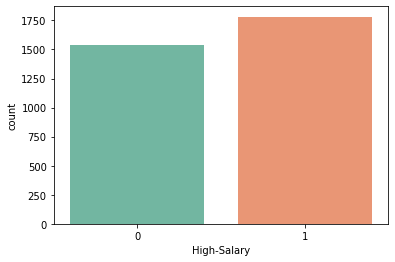

In [ ]:
# Investigating the distr of all ys
ax = sns.countplot(x = y_train, palette = "Set2")

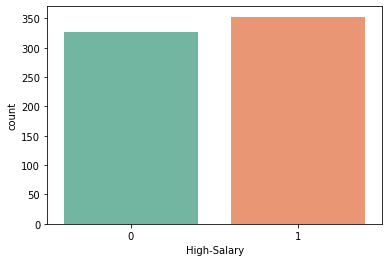

In [ ]:
ax = sns.countplot(x = y_test, palette = "Set2")

# **Model training**

### **Testing accuracy for different random states and test splits**

In [ ]:
# y = data['High-Salary']
# X = data.drop(['High-Salary','DOB','ID'], axis=1)
# # X = data.drop('DOB', axis=1)
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
for i in range(0,101):
  print(i)
  for j in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = j/100, random_state = i)
    # check the shape of X_train and X_test
    X_train.shape, X_test.shape
    # instantiate the model
    logreg = LogisticRegression(solver='liblinear', random_state=100)
    # fit the model
    logreg.fit(X_train, y_train)
    y_pred_test = logreg.predict(X_test)
    y_pred_test
    if(accuracy_score(y_test, y_pred_test)>0.75 and j>15):
      print('Model accuracy score: {0:0.4f} @random state: {1} and @testsplit(%): {2}'.format(accuracy_score(y_test, y_pred_test),i,j))
  

### **Testing accuracy for different random states and test splits**

In [ ]:
y = data['High-Salary']
X = data.drop(['High-Salary','DOB'], axis=1)
# X = data.drop('DOB', axis=1)
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
for i in range(1,100):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i/100, random_state = 88)
  # check the shape of X_train and X_test
  X_train.shape, X_test.shape
  # instantiate the model
  logreg = LogisticRegression(solver='liblinear', random_state=100)
  # fit the model
  logreg.fit(X_train, y_train)
  y_pred_test = logreg.predict(X_test)
  y_pred_test
  print('Model accuracy score: {0:0.4f} @testsplit(%): {1}'.format(accuracy_score(y_test, y_pred_test),i))

### **Declare feature vector and target** (Without Feature Selection)

In [ ]:
y = data['High-Salary']
X = data.drop(['High-Salary','DOB'], axis=1)
# X = data.drop('DOB', axis=1)


### **Regular Model Training**

**Split data into separate training and test set**

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.17, random_state = 84)#ts= 0.09,0.2,0.17,0.16|rs=9,57,88,19
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((3318, 50), (680, 50))

In [ ]:
y_train.shape, y_test.shape

((3318,), (680,))

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=100)
# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# **Predict results**

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

# **Check accuracy score**

The test-set accuracy:

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7691


The train-set accuracy:

In [ ]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7131


# **Confusion matrix**

In [ ]:
# printing the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[232  95]
 [ 62 291]]

True Positives(TP) =  232

True Negatives(TN) =  291

False Positives(FP) =  95

False Negatives(FN) =  62


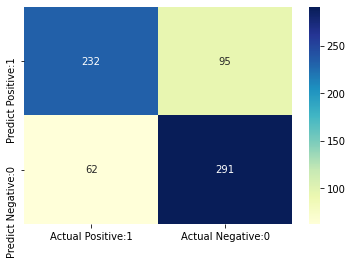

In [ ]:
# visualizing confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **Class-wise Accuracy**

In [ ]:
cm = confusion_matrix(y_test, y_pred_test,normalize='true')
print('\nTrue Positives(TP) [1] Class = ', cm[0,0])
print('\nTrue Negatives(TN) [0] Class = ', cm[1,1])


True Positives(TP) [1] Class =  0.709480122324159

True Negatives(TN) [0] Class =  0.8243626062322946


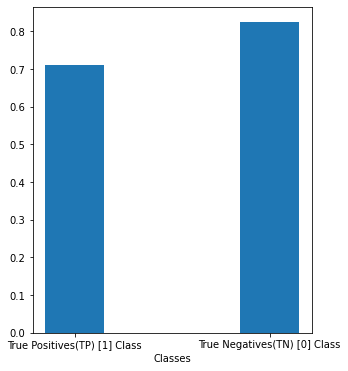

In [ ]:
dt = {'True Positives(TP) [1] Class':cm[0,0], 'True Negatives(TN) [0] Class':cm[1,1]}
c = list(dt.keys())
v = list(dt.values())
fig = plt.figure(figsize = (5, 6))
plt.bar(c, v,width = 0.3)
plt.xlabel("Classes")
plt.ylabel("")
plt.show()